# Data Visualization

we will use matplotlib, an open-source data visualization library written for Python (but we call it from Julia using PyPlot).

In [1]:
using DataFrames
using CSV
using PyPlot # plotting library

# check out all of the styles! https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
PyPlot.matplotlib.style.use("seaborn-pastel")

# change settings for all plots at once, e.g. font size
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
rcParams["font.size"] = 16

16

## Bar plots: Steak Preferences

*goal*: visualize how Americans like their steak done via a bar blot showing preference for rare, medium rare, etc. 

we can pass the column names to `CSV.read` manually via header. we also pass `copycols=true` to make the columns mutable, since we will later drop missing values.

In [2]:
df_steak = CSV.read("steak.csv", header=[:eats_steak, :how_cooked], copycols=true, DataFrame)
first(df_steak, 10) # diplay only the first ten rows to avoid clutter in notebook

Row,eats_steak,how_cooked
,String3?,String15?
1,Yes,Medium rare
2,Yes,Rare
3,Yes,Medium
4,Yes,Medium
5,Yes,Medium rare
6,No,missing
7,Yes,Medium rare
8,Yes,Medium
9,Yes,Medium rare


In [3]:
dropmissing!(df_steak)
first(df_steak,10)

Row,eats_steak,how_cooked
,String3,String15
1,Yes,Medium rare
2,Yes,Rare
3,Yes,Medium
4,Yes,Medium
5,Yes,Medium rare
6,Yes,Medium rare
7,Yes,Medium
8,Yes,Medium rare
9,Yes,Medium rare


Since we dropped the missing value, that means that the 'eats_steak' column is yes. We can double check by using the unique function. 

In [4]:
unique(df_steak[:, "eats_steak"])

1-element Vector{String3}:
 "Yes"

It appears, that 'eats_steak' column only has 1 unique option, which is yes. 

Now let's count the number of people who prefer rare, mediume, rare, etc.

In [11]:
# groupby --> Gropus the dataframe by the column `how_cooked`
# nrow --> Counts the number of rows in eahc group
# combine --> aggregate function replaced with combine and grouby
# count --> neames the nwe column (You can pkc a different name if you want)
df_steak_pref = combine(groupby(df_steak,"how_cooked"), nrow => "count") 

Row,how_cooked,count
,String15,Int64
1,Medium rare,166
2,Rare,23
3,Medium,132
4,Medium Well,74
5,Well,35


In [12]:
df_steak_pref

Row,how_cooked,count
,String15,Int64
1,Medium rare,166
2,Rare,23
3,Medium,132
4,Medium Well,74
5,Well,35


Let's reorder the dataframes cooking order

In [13]:
df_steak_pref = df_steak_pref[[2,1,3,4,5], :]

Row,how_cooked,count
,String15,Int64
1,Rare,23
2,Medium rare,166
3,Medium,132
4,Medium Well,74
5,Well,35


Let's go ahead a make a plot with the data

In [19]:
bar_ids = 1:size(df_steak_pref)[1] # Gets the first element, which is the number of rows
bar_heights = df_steak_pref[:, "count"]
bar_labels = df_steak_pref[:, "how_cooked"]


5-element PooledArrays.PooledVector{String15, UInt32, Vector{UInt32}}:
 "Rare"
 "Medium rare"
 "Medium"
 "Medium Well"
 "Well"

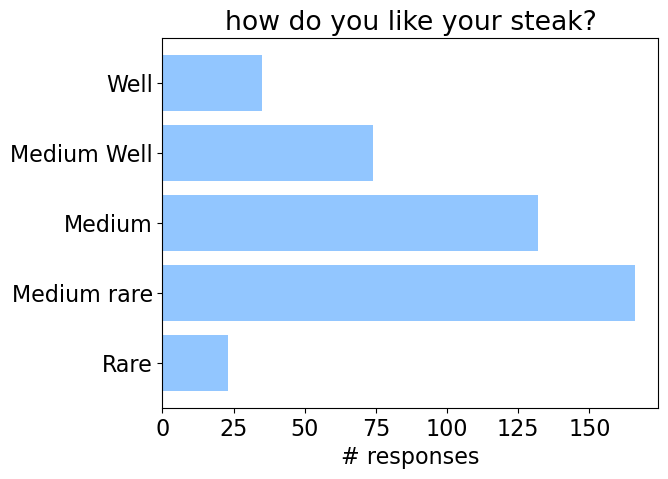

PyObject Text(0.5, 1.0, 'how do you like your steak?')

In [22]:
# construct a blank figure panel
figure()

# make bar plot (h = horizontal)
#  first argument: y-positions to center the bars [1, 2, 3, 4, 5]
#  second argument: length of the bars (which we want to set as the number of ppl that eat steak that way)
barh(bar_ids, bar_heights)

# specify wut to label the y-ticks
#  first argument: where to draw the y-ticks
#  second argument: wut text to put as a y-tick label
yticks(bar_ids, bar_labels)

# label x-axis, give a title
xlabel("# responses")
title("how do you like your steak?")

# # save as pdf
# tight_layout() # needed to adjust bounding box to include labels
# savefig("steak.pdf", format="pdf")